In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

# Ablation : NN-Sparse Zeta Selection

In [2]:
dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV1.pkl")
dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [3]:
results

,Model,zeta,count,mean_sent
0,WSM,0.000001,50,16.239519
1,WSM,0.000010,50,18.816734
2,WSM,0.000100,50,23.023863
3,WSM,0.001000,50,12.007252


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


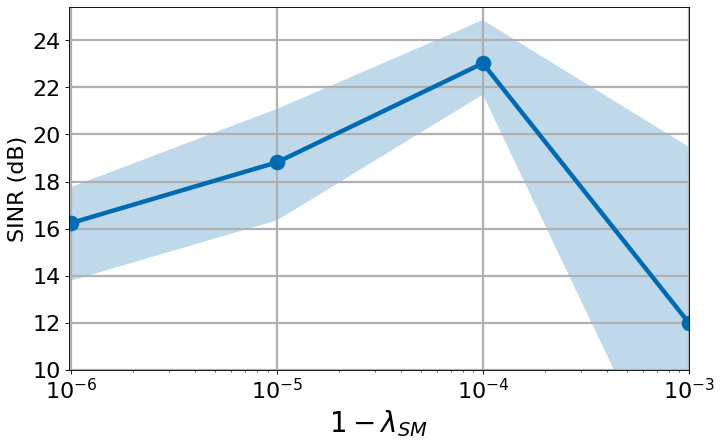

In [4]:
data= []
zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
for zeta__ in zeta_list:
    data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('zeta_ablation.pdf', format='pdf')

In [5]:
dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV2.pkl")
dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [6]:
results

,Model,zeta,count,mean_sent
0,WSM,0.000001,50,14.199886
1,WSM,0.000010,50,17.008852
2,WSM,0.000100,50,23.999767
3,WSM,0.001000,50,14.499016


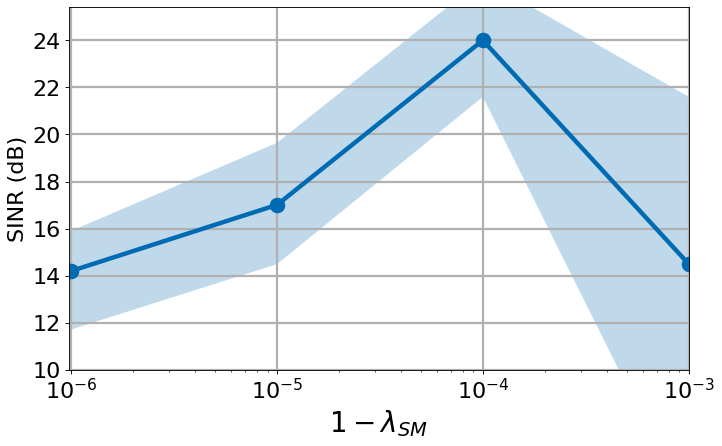

In [7]:
data= []
zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
for zeta__ in zeta_list:
    data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('zeta_ablation.pdf', format='pdf')

In [8]:
dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV3.pkl")
dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [9]:
results

,Model,zeta,count,mean_sent
0,WSM,0.000001,41,15.754506
1,WSM,0.000010,41,19.112300
2,WSM,0.000100,41,24.541350
3,WSM,0.001000,41,14.355475


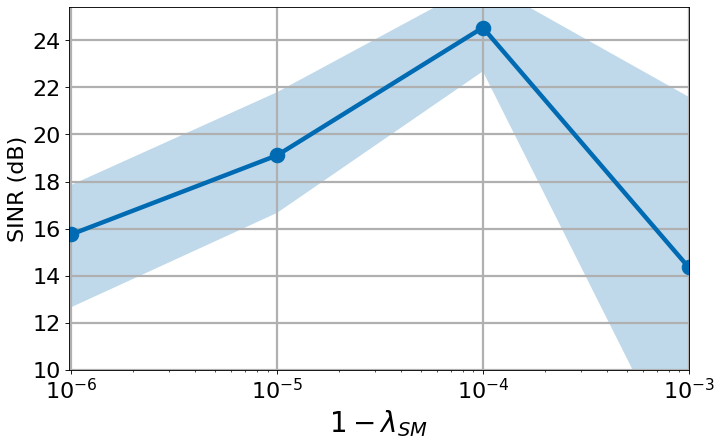

In [10]:
data= []
zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
for zeta__ in zeta_list:
    data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('zeta_ablation.pdf', format='pdf')

In [27]:
dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV4.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [28]:
results

,Model,zeta,count,mean_sent
0,WSM,0.000001,32,15.964908
1,WSM,0.000010,32,20.359666
2,WSM,0.000100,32,24.971106
3,WSM,0.001000,32,14.127564


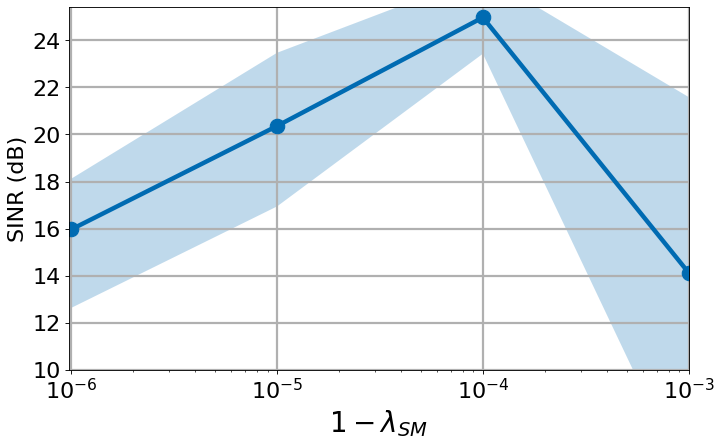

In [29]:
data= []
zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
for zeta__ in zeta_list:
    data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('zeta_ablation.pdf', format='pdf')

# Ablation : NN-Sparse Initial D1 Gain 

In [13]:
dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V1.pkl")
dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [14]:
results

,Model,D1,count,mean_sent
0,WSM,4,50,24.235810
1,WSM,8,50,23.023863
2,WSM,12,50,23.451224
3,WSM,16,50,22.500155


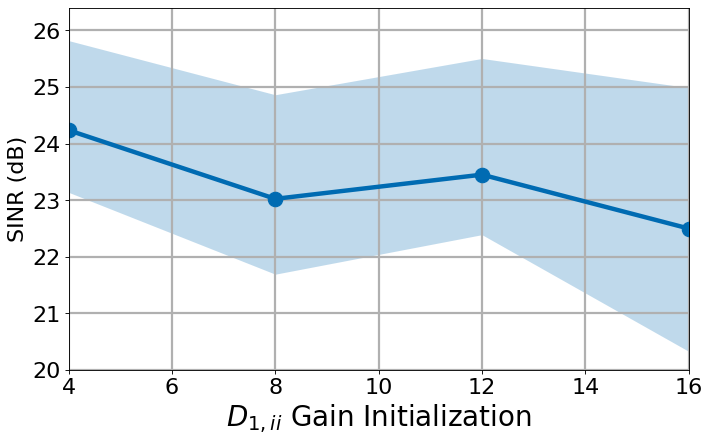

In [15]:
data= []
D1list = [4,8,12,16]
for d1start__ in D1list:
    data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4,16,20,26.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('D1start_ablation.pdf', format='pdf')

In [16]:
dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V2.pkl")
dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [17]:
results

,Model,D1,count,mean_sent
0,WSM,4,46,25.015879
1,WSM,8,46,23.898123
2,WSM,12,46,23.599750
3,WSM,16,46,23.985063


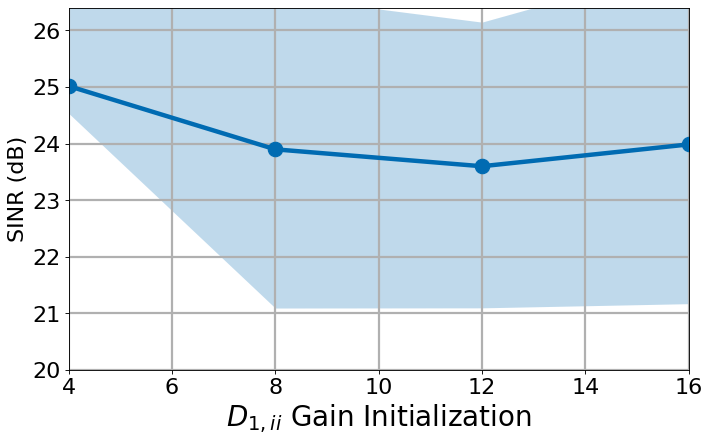

In [18]:
data= []
D1list = [4,8,12,16]
for d1start__ in D1list:
    data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4,16,20,26.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('D1start_ablation.pdf', format='pdf')

# Ablation : NN-Sparse $\mu_{D_1}$

In [19]:
dfmuD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_muD1_V1.pkl")
dfmuD1 = dfmuD1.iloc[:4*(dfmuD1.shape[0]//4)]
results = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()

In [20]:
results

,Model,muD1,count,mean_sent
0,WSM,5,32,23.901856
1,WSM,10,32,24.170873
2,WSM,15,32,24.669009
3,WSM,20,32,24.607156


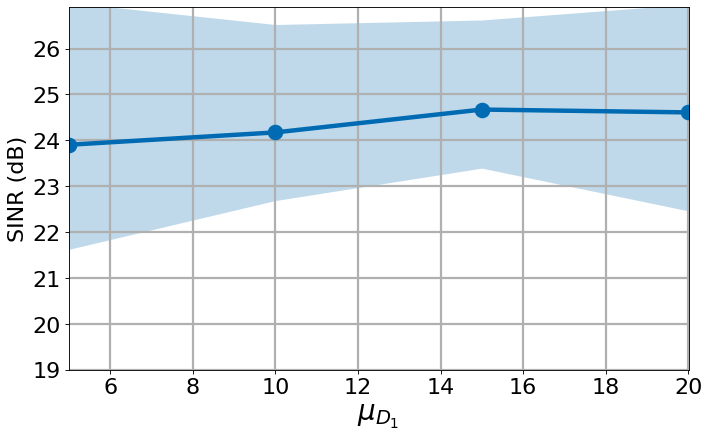

In [21]:
data= []
muD1list = [5,10,15,20]
for muD1__ in muD1list:
    data.append(dfmuD1.loc[dfmuD1['muD1'] == muD1__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['muD1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muD1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muD1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4.99,20.01,19,26.9])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$\mu_{D_{1}}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('D1start_ablation.pdf', format='pdf')

In [22]:
dfmuD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_muD1_V2.pkl")
dfmuD1 = dfmuD1.iloc[:4*(dfmuD1.shape[0]//4)]
results = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()

In [23]:
results

,Model,muD1,count,mean_sent
0,WSM,5,41,24.575654
1,WSM,10,41,24.498477
2,WSM,15,41,25.177412
3,WSM,20,41,24.094868


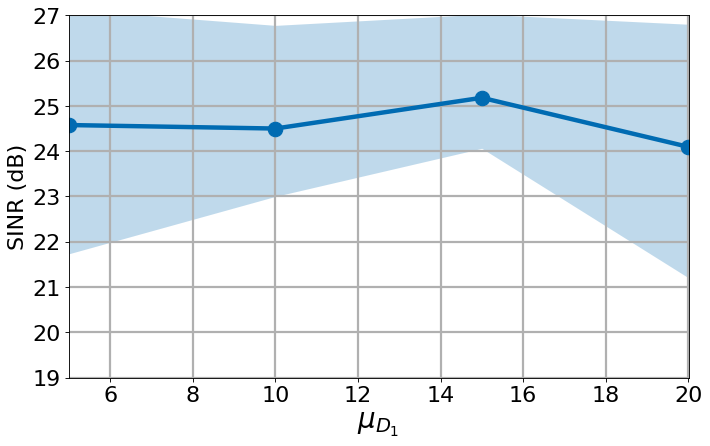

In [24]:
data= []
muD1list = [5,10,15,20]
for muD1__ in muD1list:
    data.append(dfmuD1.loc[dfmuD1['muD1'] == muD1__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['muD1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muD1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muD1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4.99,20.01,19,27])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$\mu_{D_{1}}$',fontsize=25)
ApplyFont(plt.gca())
# plt.savefig('D1start_ablation.pdf', format='pdf')

# Ablation : NN-Sparse $\gamma$

In [25]:
dfMUS = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_MUS_V1.pkl")
# dfMUS = dfMUS.iloc[:4*(dfMUS.shape[0]//4)]
results = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()

In [26]:
results

,Model,MUS,count,mean_sent
0,WSM,0.15,34,23.428249
1,WSM,0.20,34,24.387116
2,WSM,0.25,34,25.400664
3,WSM,0.30,34,24.400203
